# STA410 Programming Portfolio Assignment 4 (10 points)

Welcome.

## Rules


0. **This is a paired or individual assignment.** Specific code solutions submitted for these assignments must be created either individually or in the context of a paired effort: ***group efforts of three or more are students are not allowed.*** Please seek homework partners in-person or on the course discussion board on piazza. **Paired students each separately submit their (common) work, including (agreeing) contribution of work statements for each problem.**
  
   > Students choosing to work individually must work in accordance with the [University Student Academic Integrity values](https://www.artsci.utoronto.ca/current/academic-advising-and-support/student-academic-integrity)  of "honesty, trust, fairness, respect, responsibility and courage." Students working in pairs may share work without restriction within their pair, but must otherwise work in accordance with the [University Student Academic Integrity values](https://www.artsci.utoronto.ca/current/academic-advising-and-support/student-academic-integrity) noted above. ***Getting and sharing "hints" from other classmates is allowed; but, the eventual code creation work and submission must be your own individual or paired creation.***
   
   
1. **Do not delete or replace cells**: this erases `cell ids` upon which automated code tests are based.

    - ***If you accidentally delete a required cell*** try "Edit > Undo Delete Cells" in the notebook editor; otherwise, redownload the notebook (so it has the correct required `cells ids`) and repopulate it with your answers (assuming you don't overwrite them when you redownload the notebook).

   - ***You may add cells for scratch work*** but if required answers are not submitted through the provided cells where the answers are requested your answers may not be marked.

  > You may check if `cell ids` are present and working by running the following command in a cell 
  >
  > `! grep '"id":' <path/to/notebook>.ipynb`
  >
  > and making sure the `cell ids` **do not change** when you save your notebook.
  >
  >> ***If you are working in any environment other than*** [UofT JupyterLab](https://jupyter.utoronto.ca/hub/user-redirect/git-pull?repo=https://github.com/pointOfive/sta410hw0&branch=master&urlpath=/lab/tree/sta410hw0), [UofT JupyterHub](https://jupyter.utoronto.ca/hub/user-redirect/git-pull?repo=https://github.com/pointOfive/sta410hw0&branch=master), or [Google Colab](https://colab.research.google.com/github/pointOfive/sta410hw0/blob/master/sta410hw0.ipynb), your system must meet the following versioning requirements 
   >>
   >>   - [notebook format >=4.5](https://github.com/jupyterlab/jupyterlab/issues/9729) 
   >>   - jupyter [notebook](https://jupyter.org/install#jupyter-notebook) version [>=6.2](https://jupyter-notebook.readthedocs.io/en/stable/) for "classic" notebooks served by [jupyterhub](https://jupyterhub.readthedocs.io/en/stable/quickstart.html)
   >>   - [jupyterlab](https://jupyter.org/install) version [>=3.0.13](https://github.com/jupyterlab/jupyterlab/releases/tag/v3.0.13) for "jupyterlab" notebooks  
   >>    
   >> otherwise `cell ids` will not be supported and you will not get any credit for your submitted homework.  
      
2. **No cells may have any runtime errors** because this causes subsequent automated code tests to fail and you will not get marks for tests which fail because of previous runtime errors. 

  - Run time errors include, e.g., unassigned variables, mismatched parentheses, and any code which does not work when the notebook cells are sequentially run, even if it was provided for you as part of the starter code. ***It is best to restart and re-run the cells in your notebook to ensure there are no runtime errors before submitting your work.***
    
  - The `try`-`except` block syntax catches runtime errors and transforms them into `exceptions` which will not cause subsequent automated code tests to fail.  


3. **No jupyter shortcut commands** such as `! python script.py 10` or `%%timeit` may be included in the final submission as they will cause subsequent automated code tests to fail.

  - ***Comment out ALL jupyter shortcut commands***, e.g., `# ! python script.py 10` or `# %%timeit` in submitted notebooks.


4. **Python library imports are limited** to only libraries imported in the starter code and the [standard python modules](https://docs.python.org/3/py-modindex.html). Importing additional libraries will cause subsequent automated code tests to fail.

  > Unless a problem instructs differently, you may use any functions available from the libraries imported in the starter code; otherwise, you are expected to create your own Python functionality based on the Python stdlib (standard libary, i.e., base Python and standard Python modules).


5. You are welcome and encouraged to adapt code you find available online into your notebook; however, if you do so you must provide a link to the utilized resource. ***If failure to cite such references is identified and confirmed, your mark will be immediately reduced to 0.***  

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
from scipy.signal import fftconvolve
from scipy.fft import fft, ifft # rfft, irfft
from numpy.fft import fft, ifft # rfft, irfft
import time

# Problem 0 (required)

Are you working with a partner to complete this assignment?  
- If not, assign  the value of `None` into the variable `Partner`.
- If so, assign the name of the person you worked with into the variable `Partner`.
    - Format the name as `"<First Name> <Last Name>"` as a `str` type, e.g., "Scott Schwartz".

In [2]:
# Required: only worth points when not completed, in which case, you'll lose points
Partner = None
# This cell will produce a runtime error until you assign a value to this variable

What was your contribution in completing the code for this assignments problems? Assign one of the following into each of the `Problem_X` variables below.

- `"I worked alone"`
- `"I contributed more than my partner"`
- `"My partner and I contributed equally"`
- `"I contributed less than my partner"`
- `"I did not contribute"`

In [3]:
# Required: only worth points when not completed, in which case, you'll lose points
Problem_1 = "I worked alone"
Problem_2 = "I worked alone"
# This cell will produce a runtime error until you assign a value to this variable

# Problem 1 (5 points)

Write a function `construct_Lagrange_piecewise_polynomial(x, y, order)` which returns a function that
***interpolates*** the points $\{(x_{(i)},y_{(i)}): i= 1,\cdots,n\}$ with an ***order-k Lagrange piecewise polynomial***. I.e., the piecewise continuous concatentation of $m$ ***Lagrange polynomials*** 

\begin{align*}
   h(w) = {} & \left[\overset{\text{Piecewise}}{\underset{\text{summation}}{ \sum_{g=0}^{m-1}}} \overset{ \textbf{$k^{th}$ Order } w \in \left[x_{\left(gk^\vphantom{1pt}\right)}, x_{\left((gk+k^\vphantom{1pt}\right) } \right) }{\underset{\textbf{Lagrange polynomial}    }{ \sum_{j=0}^{k} y_{(j)} l_{gj}(w)}}\right] + \underset{\text{so } h(x_{(n)}) = y_{(n)}}{y_{(n)} \delta_{x_{(n)}}(w)} && y_{(j)} \text{ corresponds to } x_{(j)}\\
   l_{gj}(w) = {} & \underset{i \not = gk+j}{\prod_{i = gk}^{(g+1)k}} \frac{w-x_{(i)}}{x_{(gk+j)}-x_{(i)}}  \underset{ 1_A(a)=1 \text{ if } a\in A;\; 0 \text{ otherwise}}{\times\; 1_{\left[x_{\left(gk^\vphantom{1pt}\right)}, x_{\left((gk+k^\vphantom{1pt}\right) } \right)}(w)} && x_{(i)} < x_{(j)} \text{ for } i<j
\end{align*}

Note that each $l_{gj}(w)$ is the $j^{th}$ of $k+1$ ***Lagrange polynomial basis function*** defined over the range of the $g^{th}$ of $m$ overlapping subsets of the data

$$\begin{array}{c|ccc|ll}
g & +0 & \cdots & +k & \text{basis functions} & \text{domain} \\\hline
0 & x_{(0)} & \cdots & x_{(k)} & l_{00},\cdots, l_{0k} & \left[x_{(0)}, x_{(k)}\right)\\
1 & x_{(k)} & \cdots & x_{(2k)} & l_{10},\cdots, l_{1k}& \left[x_{(k)}, x_{(2k)}\right)\\
\vdots\\
g & x_{(gk)} & \cdots & x_{(gk+k)}& l_{g0},\cdots, l_{gk}& \left[x_{(gk)}, x_{(gk+k)}\right)\\
\vdots &\\ 
m-2 & x_{(n-2k)} & \cdots & x_{(n-k)} & l_{(n-1)0},\cdots, l_{(n-1)k}& \left[x_{(n-2k)}, x_{(n-k)}\right)\\
m-1 & x_{(n-k)} & \cdots & x_{(n)} & l_{(n-1)0},\cdots, l_{(n-1)k}& \left[x_{(n-k)}, x_{(n)}\right]\\
\end{array}$$

Mapping a function through points, as is done here by the ***Lagrange piecewise polynomial*** is called ***interpolation*** and this is distinct from ***approximation*** in which a reduced representation of a function is used in place of the function. Both of these are again distinct from ***estimation***, in which the parameters within a family of functional forms are chosen so the resulting function resembles observed data points. And finally, these are all again distinct from ***smoothing***, in which the family of functional forms is chosen to be simple and parsimonious and yet still capable of representating the important characteristics of the data, e.g., $E[y|x]$ or $y=\beta_0+\beta_1x$.

*This problem and conlcuding comments are inspired by **Lagrange polynomials** in the **Models for Interpolation** and **Models for Smoothing Data** sections of Chapter 4.1 **Function Approximation and Smoothing** on pages 154-156 and 157 and the paragraphs in the **introduction** and **Estimation** sections of Chapter **Approximation of Functions** on page 147 and 162 of James E. Gentle's **Computational Statistics** textbook. [Errata Warning: on page 156, cubic Lagrange polynomials join four adjacent points, not three; and, piecewise Lagrangian polynomials are not necessarily smooth at knots.]*

## Problem 0 Questions 0-1 (2 points)

An ***order-k Lagrange polynomial basis function*** is $\displaystyle l_j(w) = \prod_{i=0, i \not = j}^k \frac{w-x_{(i)}}{x_{(j)}-x_{(i)}}$. 

An ***order-k Lagrange polynomial function*** is $h(w) = \displaystyle \sum_{j=0}^k y_{(j)} l_j(w)$.

Before attempting to create the `Lagrange_piecewise_polynomial` function, first define the `construct_jth_Lagrange_basis_function` and `construct_Lagrange_polynomial` functions begun below and confirm the correctness of your function by verifying graphically that the ***Lagrange polynomial*** correctly travels through `x` and `y` with

```python
x,y = np.sort(stats.norm.rvs(size=5)), stats.norm.rvs(size=5)
plt.plot(x,y,'k.')
grid = np.linspace(x[0],x[-1], 100)
for j in range(len(x)):
    plt.plot(grid, construct_jth_Lagrange_basis_function(j, x)(grid),'k--')
plt.plot(grid, construct_Lagrange_polynomial(x,y)(grid))
#check the above first, before expanding it to the piecewise version below
#plt.plot(grid, construct_Lagrange_piecewise_polynomial(x, y, order=2)(grid))
#plt.plot(grid, construct_Lagrange_piecewise_polynomial(x, y, order=1)(grid))
```

Your `construct_jth_Lagrange_basis_function` and `construct_Lagrange_polynomial` functions will be tested for correctness.

***Hint:*** Adding `@np.vectorize` on the lines above `def jth_Lagrange_basis_function(w)` and `Lagrange_polynomial(w)` means the function is written for scalar (`float`) `w` but can be called with an vector (`np.array`) `w`.

In [4]:
def construct_jth_Lagrange_basis_function(j, x):
    # order will be len(x)-1
    @np.vectorize  # makes the function below work for np.array w
    def jth_Lagrange_basis_function(w): # defined for scalar w
        prod = 1
        for i in range(len(x)):
            if i != j:
                prod *= (w - x[i]) / (x[j] - x[i])
        return prod
    return jth_Lagrange_basis_function
    
def construct_Lagrange_polynomial(x,y):
    # the sum of the j Lagrange basis function each evaluated at w
    @np.vectorize  # makes the function below work for np.array w
    def Lagrange_polynomial(w): # defined for scalar w
        sum_ = 0
        for j in range(len(x)):
            sum_ += y[j] * construct_jth_Lagrange_basis_function(j, x)(w)
        return sum_
    return Lagrange_polynomial  

In [5]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because 
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted 
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.


In [6]:
# Cell for scratch work


In [7]:
# 1 point [format: callable function f with signature f(j,x), i.e., 
#                  the jth Lagrange basis function of order len(x_subset)-1]
p1q0 = construct_jth_Lagrange_basis_function # equivalent to
# p1q0 = lambda j, x: construct_jth_Lagrange_basis_function(j, x)

# As long as your `construct_jth_Lagrange_basis_function` is 
# correct you do not need to change anything in this cell

In [8]:
# 1 point [format: callable function f with signature f(x,y), i.e., 
#                  a Lagrange polynomial of order len(x_subset)-1 passing through x and y]

p1q1 = construct_Lagrange_polynomial # equivalent to
# p1q1 = lambda x,y: construct_Lagrange_polynomial(x,y) 

# As long as your `construct_jth_Lagrange_basis_function` is 
# correct you do not need to change anything in this cell

## Problem 1 Questions 2-3 (2 points)

Complete the `construct_Lagrange_piecewise_polynomial` function of the problem prompt by correctly piecing together ***Lagrange polynomials*** created from the `construct_Lagrange_polynomial` function.  

The `Lagrange_piecewise_polynomial` will be tested for correctness.

In [9]:
def construct_Lagrange_piecewise_polynomial(x, y, order):
    
    '''
    `x`/`y` : are numpy arrays of the same length
    `order` : each piecewise interpolation will use `order+1` data points
    
              Piecewise functions are end-to-end, so for ``order=2` and len(x)=5`
              two piecewise Lagrange polynomials of `order 2` will be made from
              `len(x[:3])=3` and `len(x[2:])=3` data points and connect at `x[2]`
    '''

    if len(x) != len(y):
        return "Error: len(x) is not len(y)."
    if len(x)%order != 1 and order != 1: 
        return "Error: order and len(x) are note compatible."
    
    @np.vectorize
    def Lagrange_piecewise_polynomial(w):
      m = (len(x) - 1) // order

    # Precompute Lagrange polynomials
      lagrange_polynomials = []
      for g in range(m):
        start_idx = g * order
        end_idx = start_idx + order + 1
        lagrange_polynomials.append(construct_Lagrange_polynomial(x[start_idx:end_idx], y[start_idx:end_idx]))
      g = min(int(np.floor((w - x[0]) / (x[order] - x[0]))), m - 1)
        
        # Evaluate the appropriate Lagrange polynomial at w
      return lagrange_polynomials[g](w)

    
    return Lagrange_piecewise_polynomial # which may be evaluated over, e.g., `np.linspace(x[0],x[-1],n)`

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because 
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted 
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.


In [ ]:
# Cell for scratch work


In [10]:
# 1 point [format: callable function f with signature f(x,y), i.e., 
#                  a piecewise Lagrange polynomial of order 2 passing through x and y]
p1q2 = lambda x,y: construct_Lagrange_piecewise_polynomial(x,y, order=2)

# As long as your `construct_jth_Lagrange_basis_function` is 
# correct you do not need to change anything in this cell

In [11]:
# 1 point [format: callable function f with signature f(x,y), i.e., 
#                  a piecewise Lagrange polynomial of order 1 passing through x and y]
p1q3 = lambda x,y: construct_Lagrange_piecewise_polynomial(x,y, order=1)

# As long as your `construct_jth_Lagrange_basis_function` is 
# correct you do not need to change anything in this cell

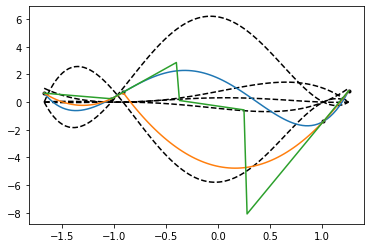

In [12]:
x,y = np.sort(stats.norm.rvs(size=5)), stats.norm.rvs(size=5)
plt.plot(x,y,'k.')
grid = np.linspace(x[0],x[-1], 100)
for j in range(len(x)):
    plt.plot(grid, p1q0(j, x)(grid),'k--')
plt.plot(grid, p1q1(x,y)(grid))
plt.plot(grid, p1q2(x,y)(grid))
plt.plot(grid, p1q3(x,y)(grid))


### Problem 1 Questions 4-7 (1 point)


4. (0.25 points) What is true about ***high order Lagrange piecewise polynomials***? 

    1. They generally have discontinuities where the pieces connect
    2. They are continuous and differentiable everywhere
    3. They will not always alternate between convex and concave pieces
    4. They are good for trend fitting and data smoothing
    

5. (0.25 points) Suppose some ***data smoothing / prediction*** model is ***estimated*** and produces $\hat y \approx E[y|x]$ which is a $k^{th}$ degree $(k+1<n=m\times k)$ polynomial in $x$. Which of the following are true?

    1. The ***Lagrange polynomial*** on $(x, \hat y)$ will be the same as the $\hat y$ curve
    2. The ***Lagrange polynomial*** on $(x, y)$ ***interpolates*** the same values as $\hat y$ 
    3. The $\hat y$ curve from $x_{(0)}$ to $x_{(n)}$ can be defined as an ***order-k piecewise Lagrange polynomial***; that is, the polynomials defining $\hat y$ and the ***order-k piecewise Lagrange polynomial*** are unique and pass through the same points so they're identical 
    4. None of the above
    

6. (0.25 points) Which of the following describes ***approximating*** a $k^{th}$ degree ***Lagrange polynomial*** defined over $k+1$ data points by setting $y_{(j)}$ to $0$ for some of the Lagrange basis functions?

    1. A ***lower order piecewise Lagrange polynomial*** resulting in different Lagrange basis functions
    2. Removing some of the Lagrange basis functions producing a $k'<k$ order polynomial defined over $k+1$ data points
    3. Using a ***smoothing matrix*** to produce $\hat y \approx E[y|x]$ 
    4. None of the above
    

    
7. (0.25 points) Which of the following is correct?

    1. ***Approximation*** is when a reduced representation of a function is used in place of the function
    2. ***Estimation*** is when a family of functional forms is chosen to model $E[y|x]$
    3. ***Data smoothing / Prediction*** is when the parameters within a family of functional forms are chosen so the resulting function resembles observed data
    4. None of the above


In [ ]:
# 0.25 points each [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q4 = "A"
p1q5 = "D" 
p1q6 = "B" 
p1q7 = "B"
# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until the `p1q3`-`p1q10` variables are assigned values

# Problem 2 (5 points)

The numerical ***convolution*** of the discrete representations $\texttt{g}_\texttt{X}[j] \equiv g_X(-z_0+j\epsilon)$ and $\texttt{h}_\texttt{Y}[j] \equiv h_Y(-z_0+j\epsilon)$ for $j=0,\cdots, n=1$ of the two density functions $g_X$ and $h_Y$ is $\require{cancel}$

\begin{align*}
f_{Z=X+Y}(z_k = -z_0 + k \epsilon) = (g_X * h_Y)(z_k) & = {} \int_{\rm I \! R} g_X(t) h_Y(z_k-t) dt\\
& \approx  {}
\int_{-z_0 = -\frac{n}{2}\epsilon }^{z_0-\epsilon = -z_0+(n-1)\epsilon }\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\! g_X(t)h_Y(z_k-t) dt \\
& \approx {} \sum_{j=0}^{n-1} \epsilon g_X(-z_0+\epsilon j)h_Y(z_k - (-z_0+\epsilon j)) = \sum_{j=0}^{n-1} \epsilon g_X(-z_0+\epsilon j)h_Y(\cancel{-z_0 + z_0} + \epsilon (k-j)))\\
& = {} \sum_{j=0}^{n-1} \epsilon \,\texttt{g}_\texttt{X}\texttt{[j]}\;\underbrace{\texttt{h}_\texttt{Y}^{\texttt{0pd}}\left[\frac{\texttt{n}}{\texttt{2}}+\texttt{k-j}\right]}_{=h_Y\left(\cancel{-z_0} + \epsilon\left(\cancel{\frac{n}{2}} +k -j\right) \right)} \equiv \tilde f_{\texttt{X+Y}}\texttt{[k]}
\end{align*}

where $\texttt{h}_\texttt{Y}^{\texttt{0pd}}$ indicates the ***circular specification*** such that $\texttt{h}_\texttt{Y}$ is ***zero-padded*** with $\texttt{h}_\texttt{Y}^{\texttt{0pd}}\texttt{[0:n]}=\texttt{h}_\texttt{Y}\texttt{[0:n]}$,  $\texttt{h}_\texttt{Y}^{\texttt{0pd}}\texttt{[n:2n]}=0$, and $\texttt{h}_\texttt{Y}^{\texttt{0pd}}\texttt{[-j]} = \texttt{h}_\texttt{Y}^{\texttt{0pd}}\texttt{[2n-j]}$ for $\texttt{j>0}$ (in the usual `Python` manner).

> For this approximation to work well, $g_X(z)$ and $h_Y(z)$ must vanish to $0$ beyond the range of the approximations $\texttt{g}_\texttt{X}$ and $\texttt{h}_\texttt{Y}$.


This ***convolution*** can also be specified via the ***convolution theorem*** based on the ***Fourier transform*** 

$$f_{Z=X+Y}(z_k) = (g_X * h_Y)(z_k) = \mathcal F^{-1}(\mathcal F(g_X) \cdot \mathcal F(h_X))(z_k)$$

which can in turn be numerically computed using a ***discrete approximation*** of the ***convolution theorem*** based on the ***discrete Fourier transform*** ($\texttt{DFT}$) 

$$f_{Z=X+Y}(z_k) = (g_X * h_Y)(z_k) \approx \tilde f_{\texttt{X+Y}}\texttt{[k]} = \texttt{IDFT}(\texttt{DFT}(\texttt{g}_\texttt{X}^{\texttt{0pd}}) \cdot \texttt{DFT}(\texttt{h}_\texttt{Y}^{\texttt{0pd}}))\texttt{[k]}$$

although of course the computation will instead use the ***fast Fourier transform*** ($\texttt{FFT}$) of the $\texttt{DFT}$

$$f_{Z=X+Y}(z_k) = (g_X * h_Y)(z_k) \approx \tilde f_{\texttt{X+Y}}\texttt{[k]} = \texttt{IFFT}(\texttt{FFT}(\texttt{g}_\texttt{X}^{\texttt{0pd}}) \cdot \texttt{FFT}(\texttt{h}_\texttt{Y}^{\texttt{0pd}}))\texttt{[k]}$$


> In the case of the ***discrete approximation*** of the ***convolution theorem*** based on the $\texttt{FFT}$, notice that the ***circular specification*** based on ***zero-paddeding*** for both $\texttt{h}_\texttt{Y}^{\texttt{0pd}}$ and $\texttt{g}_\texttt{X}^{\texttt{0pd}}$ is used. This is because the ***discrete approximation*** requires the elementwise multiplication 
>
> $$\texttt{FFT}(\texttt{g}_\texttt{X}^{\texttt{0pd}}) \cdot \texttt{FFT}(\texttt{h}_\texttt{Y}^{\texttt{0pd}})$$
>
> Further, recall that under the ***circular specification*** the ***convolution*** that 
>
> $$\tilde f_{\texttt{X+Y}}\texttt{[0:n]} \quad \text{ corresponds to } \quad \texttt{h}_\texttt{Y}^{\texttt{0pd}}\left[\frac{\texttt{n}}{\texttt{2}}:\frac{\texttt{3n}}{\texttt{2}}\right]$$
>
> It is analagously the case that 
> 
> $$\tilde f_{\texttt{X+Y}}\texttt{[0:n]} \quad \text{ corresponds to } \quad \texttt{IFFT}(\texttt{FFT}(\texttt{g}_\texttt{X}^{\texttt{0pd}}) \cdot \texttt{FFT}(\texttt{h}_\texttt{Y}^{\texttt{0pd}}))\left[\frac{\texttt{n}}{\texttt{2}}:\frac{\texttt{3n}}{\texttt{2}}\right]$$
>
> under the ***discrete approximation*** of the ***convolution theorem*** based on the ***discrete/fast Fourier transform*** when using the ***circular specification***.


The questions of this problem will explore the implementations of these algorithms and compare their numerical efficiency through the creation and use the functions 
`f_ZisXplusY_integrate_quad`, 
`f_ZisXplusY_fftconvolve`, 
`f_ZisXplusY_convolution`, 
`f_ZisXplusY_fftifft`, and 
`FFT` and `f_ZisXplusY_FFT`
which will be detailed below.


*This problem is inspired by the **Convolutions** and **Discrete Transformations** sections in Chapter 3.3 **Efficiency** on pages 124-126 of James E. Gentle's **Computational Statistics** textbook. [Errata Warnings: on page 125-126, $n$ in the expression for $c(y)$ and $b(y)$ is a typo and should be $m$; on page 126 immediately thereafter, rather than introducing the new variable $k$, it would be clearer to continue to use $m$ as the "midpoint"; and in the code on page 126 `wp` should be `ws` and the for loop shoud go to `k-1` not `n-1`.]*

### Hints

- This problem is based upon course notes sections
    - **5.4.2 The Convolution Theorem** 
    - **5.4.3 "Circular" Convolutions**
    - **5.4.5 Transformation Applicability**
    - **5.4.7 Fast Fourier Transform (FFT)**


- None of your solutions may not be based on integration functions such as in `scipy.integrate`, but they may be checked with 

```Python
import scipy.integrate as integrate
def f_ZisXplusY_integrate_quad(g_X, h_Y, zgrid):
    '''g_X and h_Y are callable functions for this function
       not np.array discrete representations of g_X and h_Y
       based on their evaluation over zgrid
    '''
    @np.vectorize
    def integrate_quad(z):
        return integrate.quad(lambda t: g_X(t)*h_Y(z-t), np.min(zgrid), np.max(zgrid))
    return integrate_quad(zgrid)[0]
```    

- None of your solutions may not be based on `fftconvolve` from `scipy.signal`, but they may be checked with 

```Python
from scipy.signal import fftconvolve
def f_ZisXplusY_fftconvolve(g_X, h_Y, epsilon):    
    '''g_X and h_Y np.array discrete representations based on the
       evaluation of these functions over an epsilon-spaced grid
     '''    
                                 # fftconvolve(..., mode='same') automatically correctly zero-pads 
    f_ZisXplusY_fftconvolve_grid = fftconvolve(g_X, h_Y, 'same') 
                                 # output to corresponds to input withouth manual extraction 
                                 # but normalization is still required
    return f_ZisXplusY_fftconvolve_grid/f_ZisXplusY_fftconvolve_grid.sum()/epsilon
```

- Your results may be visually examined with, e.g.,

```Python
g_X = stats.norm.pdf
h_Y = g_X
epsilon = 12/2**8
zgrid = np.arange(-6,6,epsilon)
m = zgrid.shape[0]
def zeropad(x):
    '''append n zeros to end length n np.array x 
       returning length m=2n np.array'''
    return np.c_[x[np.newaxis,:],np.zeros((1,len(x)))][0,:]

plt.plot(zgrid, f_ZisXplusY_integrate_quad(g_X, h_Y, zgrid))
plt.plot(zgrid, f_ZisXplusY_fftconvolve(g_X(zgrid), h_Y(zgrid), epsilon))
# The following will work once these functions are defined
#for f in [f_ZisXplusY_convolution, f_ZisXplusY_fftifft, FFT, f_ZisXplusY_FFT]:
#    plt.plot(zgrid, f(zeropad(g_X(zgrid)), zeropad(h_Y(zgrid)), epsilon))
```

## Problem 2 Question 0 (1.5 points)

0. (1.5 points) Complete the function `f_ZisXplusY_convolution(g_X_0pd, h_Y_0pd, epsilon)` which computes $\tilde f_\texttt{Z}$ directly as a ***convolution*** (without the ***convolution theorem***) using the ***circular specification*** based on length $m$ ***zero-padded*** numerical (`np.array`) representations  $\texttt{g}_\texttt{X}^{\texttt{0pd}}$ and $\texttt{h}_\texttt{Y}^{\texttt{0pd}}$ of the density functions $g_X$ and $h_Y$ where the first $n=\frac{m}{2}$ elements correspond to $g_X$ and $h_Y$ evaluated over an equally spaced `zgrid` $-z_j=z_0+j\epsilon$ for $j=0,\cdots,n-1$. 

  - The `for` loops should iterate through `n` rather than `m` since `g_X_0pd[n:]` is `0`
  - Do not bother including $\epsilon$ in your computation

    $$\sum_{j=0}^{n-1} \cancel{\Large \epsilon}\,\texttt{g}_\texttt{X}\texttt{[j]}\;\texttt{h}_\texttt{Y}^{\texttt{0pd}}\left[\frac{\texttt{n}}{\texttt{2}}+\texttt{k-j}\right]\equiv \tilde f_{\texttt{X+Y}}\texttt{[k]}$$

    and instead just normalize once everything is completed by returning $\frac{\tilde f_{\texttt{X+Y}}}{\epsilon \tilde f_{\texttt{X+Y}}\texttt{.sum()}}$ with length $n$ (not $m=2n$) where this final normalization step ensures $\sum_{k=0}^{n-1} \epsilon \, \frac{\tilde f_{\texttt{X+Y}}\texttt{[k]}}{\epsilon \tilde f_{\texttt{X+Y}}\texttt{.sum()}} = 1$ so that the returned `np.array` is a discrete approximation representation of a density function that has area 1.
    
The function `f_ZisXplusY_convolution` will be tested directly.

In [13]:
# predefined helper function
def zeropad(x):
    '''append n zeros to end length n np.array x 
       returning length m=2n np.array'''
    return np.c_[x[np.newaxis,:],np.zeros((1,len(x)))][0,:]

def f_ZisXplusY_convolution(g_X_0pd, h_Y_0pd, epsilon):
    '''
    Riemann integral approximation of convolution f_Z = (g_X*h_Y) 
    for discrete function representations g_X and h_Y using the
    circular specification with zero padding on g_X and h_Y

    g_X_0pd: (np.array) length m=2*n
         last n=m/2 values assumed to be "zero-padded" with g_X[n:] all 0
         ***but they are never used***
    h_Y_0pd: (np.array) length m=2*n
         last n=m/2 values assumed to be "zero-padded" with h_Y[n:] all 0
    epsilon: (float) the grid spacing upon which g_X and h_Y were evaluated
           z_0, z_0+epsilon, z_0+2*epsilon, ... , z_0+(n-1)*epsilon  

    return: tilde_f_Z (np.array) length n normalized to have sum 1/epsilon
            such that (epsilon*tilde_f_Z).sum()=1
    '''
    
    n = int(len(g_X_0pd)/2)
    f_ZisXplusY_convolution_grid = 0*g_X_0pd[:n]
    # <complete>
    for i in range(n):
      for j in range(n):
        f_ZisXplusY_convolution_grid[i] += g_X_0pd[j] * h_Y_0pd[i - j]

    f_ZisXplusY_convolution_grid *= 1 / (epsilon * n)  # normalize the result
    return f_ZisXplusY_convolution_grid

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because 
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted 
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.


In [ ]:
# Cell for scratch work


Should be 1: 0.24118453775706594


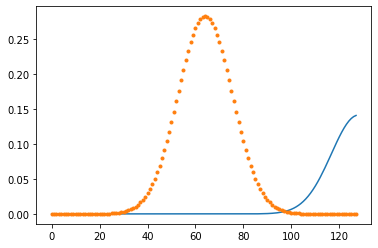

In [14]:
g_X = stats.norm.pdf
h_Y = g_X 
epsilon = 2**5/2**8
zgrid = np.arange(-8,8,epsilon)
tilde_f_Z = f_ZisXplusY_convolution(zeropad(g_X(zgrid)), zeropad(h_Y(zgrid)), epsilon)
plt.plot(tilde_f_Z)
print("Should be 1:", tilde_f_Z.sum()*epsilon) # so it's a discrete approximation of a density
_ = plt.plot(stats.norm(scale=2**.5).pdf(zgrid),".") # true distribution...

## Problem 2 Question 1 (0.5 points)

1. (0.5 points) Complete the function `f_ZisXplusY_fftifft(g_X_0pd, h_Y_0pd, epsilon)` which computes $\tilde f_\texttt{Z}$ based on a ***discrete approximation*** of the ***convolution theorem*** using the ***fast Fourier transform*** ($\texttt{fft}$) with a ***circular specification*** for length $m$ ***zero-padded*** numerical (`np.array`) representations  $\texttt{g}_\texttt{X}^{\texttt{0pd}}$ and $\texttt{h}_\texttt{Y}^{\texttt{0pd}}$ of the density functions $g_X$ and $h_Y$ where the first $n=\frac{m}{2}$ elements correspond to $g_X$ and $h_Y$ evaluated over an equally spaced `zgrid` $-z_j=z_0+j\epsilon$ for $j=0,\cdots,n-1$. That is, using

    \begin{align*}
    f_{Z=X+Y} = (g_X * h_Y) & = {} \mathcal F^{-1}(\mathcal F(g_X) \cdot \mathcal F(h_X))\\
    & \approx {} \tilde f_\texttt{Z} \\
    \texttt{f}_\texttt{Z}^* & = {} \texttt{ifft( fft(}\texttt{g}_\texttt{X}\texttt{) $\cdot$ fft(}\texttt{h}_\texttt{Y}\texttt{) )}\\
        \texttt{f}_\texttt{Z}^{**} & = {} \frac{\texttt{f}_\texttt{Z}^*\texttt{[(n/2):(n*3/2)]}}{ \texttt{f}_\texttt{Z}^*\texttt{[(n/2):(n*3/2)].sum()}}\\
        \tilde f_\texttt{Z} & = {} \frac{\texttt{f}_\texttt{Z}^{**}}{\epsilon}
    \end{align*}

    for ***Fourer transform*** $\mathcal F$ and ***inverse Fourier transform*** $\mathcal F^{-1}$
    using any of the `numpy` or `scipy` implementations 
    - `from scipy.fft import fft, ifft # rfft, irfft`
    - `from numpy.fft import fft, ifft # rfft, irfft`

  and where the final normalization steps ensure $\sum_{j=0}^{n-1} \epsilon \, \tilde f_\texttt{Z}\texttt{[j]} = 1$ so that length $n$ $\tilde f_\texttt{Z}$ represents a density with area 1.

The function `f_ZisXplusY_fftifft` will be tested directly.

In [15]:
from scipy.fft import fft, ifft # rfft, irfft
from numpy.fft import fft, ifft # rfft, irfft
def f_ZisXplusY_fftifft(g_X_0pd, h_Y_0pd, epsilon):
    '''
    Discrete convolution theorem approximation of convolution f_Z = (g_X*h_Y) 
    based on [`numpy|`scipy`] `fft` implementations using the
    circular specification with zero padding on g_X and h_Y

    g_X_0pd: (np.array) length m=2*n
         last n=m/2 values assumed to be "zero-padded" with g_X_0pd[n:] all 0
    h_Y_0pd: (np.array) length m=2*n
         last n=m/2 values assumed to be "zero-padded" with h_Y_0pd[n:] all 0
    epsilon: (float) the grid spacing upon which g_X and h_Y were evaluated
           z_0, z_0+epsilon, z_0+2*epsilon, ... , z_0+(n-1)*epsilon  

    return: tilde_f_Z[(n/2):(3*n/2)] normalized to have sum 1/epsilon
            such that (epsilon*tilde_f_Z[(n/2):(3*n/2)]).sum()=1
    '''
    
    # <complete convolution_theorem and correct the subset extraction and normalization>    
    fft_g_X = fft(g_X_0pd)
    fft_h_Y = fft(h_Y_0pd)
    f_ZisXplusY_fftifft_grid = ifft(fft_g_X * fft_h_Y)  # Apply convolution theorem
    n = len(g_X_0pd) // 2
    f_ZisXplusY_fftifft_grid = f_ZisXplusY_fftifft_grid[:n]  # Extract the correct subset
    f_ZisXplusY_fftifft_grid /= (epsilon * f_ZisXplusY_fftifft_grid.sum())  # Normalize
    return np.abs(f_ZisXplusY_fftifft_grid)  

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because 
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted 
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.


In [ ]:
# Cell for scratch work


Should be about 1: 1.0


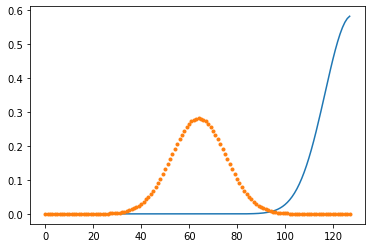

In [17]:
g_X = stats.norm.pdf
h_Y = g_X 
epsilon = 2**5/2**8
zgrid = np.arange(-8,8,epsilon)
tilde_f_Z = f_ZisXplusY_fftifft(zeropad(g_X(zgrid)), zeropad(h_Y(zgrid)), epsilon)
plt.plot(tilde_f_Z)
print("Should be about 1:", tilde_f_Z.sum()*epsilon) # so it's a discrete approximation of a density
_ = plt.plot(stats.norm(scale=2**.5).pdf(zgrid),".") # true distribution...

## Problem 2 Question 2 (1.5 points)

2. Complete the function `FFT(x,w)` which implements the [radix-2 (DIT) FFT](https://stackoverflow.com/questions/28009590/understanding-the-radix-2-fft-recursive-algorithm) recusive divide and conquer algorithm by [Cooley and Tukey](https://en.wikipedia.org/wiki/Cooley–Tukey_FFT_algorithm) which returns the ***Fourier transformation*** of the `np.array` input `x`.


  > \begin{align*} &\text{FFT}(x,w=e^{-2\pi i/n})\\
  & \quad \text{if}(\text{len}(x)=1) \{\\
  & \quad \quad \text{return } x_0\\
  & \quad \} \text{else}\{\\
  & \quad \quad n = \text{len}(x)\\
  & \quad \quad a, \; b = (x_1,x_3,\cdots, x_{n-1}), \; (x_0,x_2,\cdots,x_{n-2})\\
  & \quad \quad \tilde a, \; \tilde b = \text{FFT}(a, w^2), \; \text{FFT}(b, w^2) \\
  & \quad \quad m=n/2\\
  & \quad \quad \text{for}(k = 0, \cdots, m-1)\{\\
  & \quad \quad \quad \tilde x_k, \; \tilde x_{k+m} = \tilde b_k \! + \! w^k \tilde a_k, \; \tilde b_k \! - \! w^k \tilde  a_k \\
  & \quad \quad \}\\  
  & \quad \}\\ 
  & \quad \text{return }  \tilde x\\  
\end{align*}

The function `FFT` will be tested directly. It should perform the correct ***Fourier transform***, and with different inputs should also be usable as the ***inverse Fourier transform***.  Only `x` inputs satisfying `len(x)=2**p` for integer `p` will be tested.

***Hint***: What is `FFT(x, np.exp(2j*np.pi/len(x)))`?  Could it help confirm that `FFT(x, np.exp(-2j*np.pi/len(x)))` is working?

The function `FFT` will be tested directly.

In [18]:
def FFT(x, w):
    '''
    Radix-2 (DIT) FFT (Cooley-Tukey) recursive algorithm
    Fast (Discrete) Fourier Tranform of x
    
    x: (np.array) with len(x)=2**p for integer p>=0 for 
    w: a 2**p for integer p>=0 power of np.exp(-2j*np.pi/len(x))
       w should be np.exp(-2j*np.pi/len(x)) on the first function call
    
    returns: the Fast Fourier transform of x
    '''
    n = len(x)
    if n == 1:
        return x

    a, b = x[::2], x[1::2]
    w2 = w * w
    fft_a, fft_b = FFT(a, w2), FFT(b, w2)
    
    m = n // 2
    fft_x = np.empty(n, dtype=complex)
    
    w_k = 1
    for k in range(m):
        t = w_k * fft_b[k]
        fft_x[k], fft_x[k + m] = fft_a[k] + t, fft_a[k] - t
        w_k *= w
        
    return fft_x

## Problem 2 Question 3 (0.5 points)

3. (0.5 points) Create `f_ZisXplusY_FFT` which is identical to the `f_ZisXplusY_fftifft` function except that it uses the radix-2 `FFT` implementation above in place of the built-in `numpy` or `scipy` `fft` and `ifft` functions. 

The function `f_ZisXplusY_FFT` will be tested directly.

In [20]:
def f_ZisXplusY_FFT(g_X_0pd, h_Y_0pd, epsilon):
    '''
    Discrete convolution theorem approximation of convolution f_Z = (g_X*h_Y) 
    using the circular specification with zero padding on g_X and h_Y
    based on FFT rather than [`numpy|`scipy`] `fft` implementations 

    g_X_0pd: (np.array) length m=2*n
         last n=m/2 values assumed to be "zero-padded" with g_X_0pd[n:] all 0
    h_Y_0pd: (np.array) length m=2*n
         last n=m/2 values assumed to be "zero-padded" with h_Y_0pd[n:] all 0
    epsilon: (float) the grid spacing upon which g_X and h_Y were evaluated
           z_0, z_0+epsilon, z_0+2*epsilon, ... , z_0+(n-1)*epsilon  

    return: tilde_f_Z[(n/2):(3*n/2)] normalized to have sum 1/epsilon
            such that (epsilon*tilde_f_Z[(n/2):(3*n/2)]).sum()=1
    '''
    
    n = len(g_X_0pd)

    # Apply FFT
    G_X = FFT(g_X_0pd, np.exp(-2j * np.pi / n))
    H_Y = FFT(h_Y_0pd, np.exp(-2j * np.pi / n))

    # Compute the convolution theorem
    F_Z_star = np.empty(n, dtype=complex)
    for i in range(n):
        F_Z_star[i] = G_X[i] * H_Y[i]

    # Apply the inverse FFT
    f_Z_star = FFT(F_Z_star, np.exp(2j * np.pi / n))

    # Extract the subset and normalize
    f_Z_star = f_Z_star[n // 2: 3 * n // 2] / f_Z_star[n // 2: 3 * n // 2].sum()
    tilde_f_Z = f_Z_star / epsilon

    return np.abs(tilde_f_Z)

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because 
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted 
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.


In [23]:
# Cell for scratch work


Should be 1: 1.0000000000000067


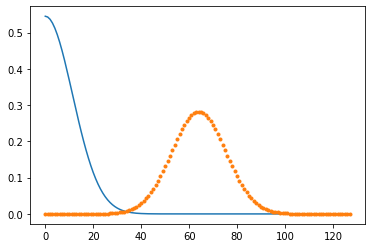

In [21]:
g_X = stats.norm.pdf
h_Y = g_X 
epsilon = 2**5/2**8
zgrid = np.arange(-8,8,epsilon)
tilde_f_Z = f_ZisXplusY_FFT(zeropad(g_X(zgrid)), zeropad(h_Y(zgrid)), epsilon)
plt.plot(tilde_f_Z)
print("Should be 1:", tilde_f_Z.sum()*epsilon) # so it's a discrete approximation of a density
_ = plt.plot(stats.norm(scale=2**.5).pdf(zgrid),".") # true distribution...

### Problem 2 Question 4 (0.5 points)

4. For the following problem setup

    ```python
epsilon = 12/2**13
zgrid = np.arange(0,1,epsilon)
g_X = stats.t(df=2).pdf
h_Y = g_X 
    ```

    which are the three slowest algorithms in order starting with the slowest?

    - (A) `f_ZisXplusY_fftifft` 
    - (B) `f_ZisXplusY_FFT`
    - (C) `f_ZisXplusY_fftconvolve`
    - (D) `f_ZisXplusY_convolution`
    - (E) `f_ZisXplusY_integrate_quad`

***Hints:*** Don't forget to call each function appropriately. The `f_ZisXplusY_integrate_quad` function expects functions `g_X` and `h_Y` while the `f_ZisXplusY_fftconvolve` function does not require ***zero-padding*** while the remaining functions do.

- You may import the necessary functions for the purposes of time-benchmarking `f_ZisXplusY_fftconvolve` and `f_ZisXplusY_integrate_quad` (and confirming that outputs of your own implementations are correct) but these functions may not be used as part of the implementations of the other functions.



- You can use `import time` to examine run times

```python
toc = time.perf_counter()
# do something
tic = time.perf_counter()
print(tic-toc)
```

In [24]:
# (0.5) points [format: `str` of length three characters]
p2q4 = "EDB" 
         # e.g., "ABC" means "A" is the slowest, "B" is the second slowest, and "C" is the second slowest

### Problem 2 Question 5 (0.5 points)

5. Is the result of the previous questions the same when the problem setup is changed to the following?

    ```Python
epsilon = 12/2**8
zgrid = np.arange(0,1,epsilon)
g_X = stats.t(df=2).pdf
h_Y = g_X 
   ```
   
   1. No, because the complexity of the algorithms is the same
   2. No, because the difference in the input size is insignificant
   3. Yes, because lower order computational cost related to overhead is more relevant as input size decreases
   4. Yes, because the the complexity of the algorithms change as the input size changes

In [25]:
# 0.5 points [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p2q5 = "C" 
# Uncomment the above and keep only either "A" or "B" or "C" or "D"